In [1]:
from __future__ import division, print_function
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

## Create data for example

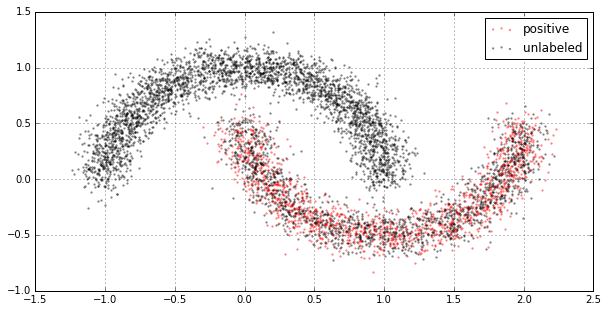

In [2]:
N = 6000
X, y = make_moons(n_samples=N, noise=0.1, shuffle=True)
rp = np.random.permutation(int(N/2))
data_P = X[y==1][rp[:int(len(rp)/2)]]
data_U = np.concatenate((X[y==1][rp[int(len(rp)/2):]], X[y==0]), axis=0)
plt.figure(figsize=(10, 5))
plt.scatter(data_P[:, 0], data_P[:, 1], c='r', linewidth=0, s=5, alpha=0.5, label='positive')
plt.scatter(data_U[:, 0], data_U[:, 1], c='k', linewidth=0, s=5, alpha=0.5, label='unlabeled')
plt.grid()
plt.legend()

## Transductive PU learning of bagging decision trees ensemble

In [3]:
NP = data_P.shape[0]
NU = data_U.shape[0]

T = 500
K = NP
train_label = np.zeros(shape=(NP+K,))
train_label[:NP] = 1.0
n_oob = np.zeros(shape=(NU,))
f_oob = np.zeros(shape=(NU, 2))
for i in range(T):
    # Bootstrap resample
    bootstrap_sample = np.random.choice(np.arange(NU), replace=True, size=K)
    # Positive set + bootstrapped unlabeled set
    data_bootstrap = np.concatenate((data_P, data_U[bootstrap_sample, :]), axis=0)
    # Train model
    model = DecisionTreeClassifier(max_depth=None, max_features='sqrt', criterion='entropy')
    model.fit(data_bootstrap, train_label)
    # Index for the out of the bag (oob) samples
    idx_oob = sorted(set(range(NU)) - set(np.unique(bootstrap_sample)))
    # Transductive learning of oob samples
    f_oob[idx_oob] += model.predict_proba(data_U[idx_oob])
    n_oob[idx_oob] += 1

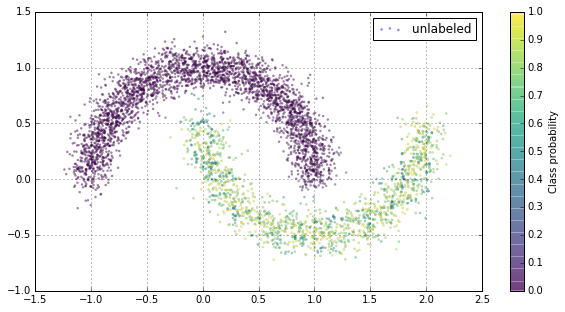

In [4]:
# Plot the class probabilities for the unlabeled samples
plt.figure(figsize=(10, 5))
plt.scatter(data_U[:, 0], data_U[:, 1], c=f_oob[:, 1]/n_oob, 
            linewidth=0.1, s=5, alpha=0.5, cmap=plt.cm.viridis, label='unlabeled')
plt.grid()
plt.legend()
plt.colorbar(label='Class probability')